**Integrantes:**


*   Carolina Ferreira
*   Gustavo Willian
*   Mateus Caçabuena
*   Vitória Gonzalez





In [25]:
from sklearn import (
    neural_network,
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as model_selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados de treino
df_treino = pd.read_csv('dados_treinamento_corrigido_completo.csv')
df_treino.head()

X_treino = df_treino.drop(columns=['class'])
y_treino = df_treino['class']

In [ ]:
# Carregar os dados de teste
df_teste = pd.read_csv('dados_teste.csv')
df_teste.head()

X_teste = df_teste.drop(columns=['class'])
y_teste = df_teste['class']

# k_NN Section


In [26]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

# Train the classifier
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

In [27]:
y_pred = knn.predict(X_teste)

mat = confusion_matrix(y_teste, y_pred, labels=['hasgame', 'owin', 'tie', 'xwin'])
accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred, average='macro', zero_division=0)
recall = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.7112299465240641
Precisão: 0.7474241158451684
Recall: 0.743452380952381
F1-Score: 0.743907323466687


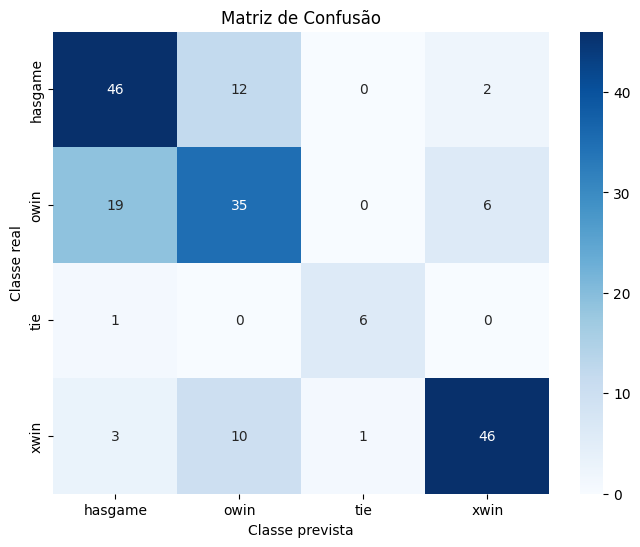

In [28]:
# Criar a matriz de confusão
# Nomes para o eixo
labels = ['hasgame', 'owin', 'tie', 'xwin']

# Plot usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.title('Matriz de Confusão')
plt.show()

<Figure size 1000x600 with 0 Axes>

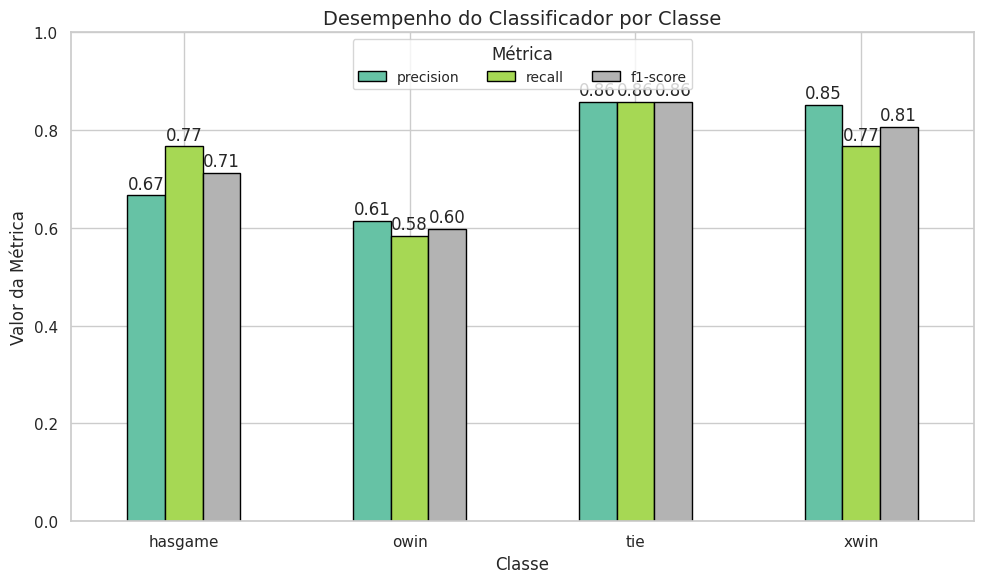

In [29]:
report = classification_report(y_teste, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
classes = ['hasgame', 'owin', 'tie', 'xwin']
df_filtered = df_report.loc[classes, ['precision', 'recall', 'f1-score']]

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

ax = df_filtered.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# Ajusta elementos visuais
plt.title('Desempenho do Classificador por Classe', fontsize=14)
plt.ylabel('Valor da Métrica')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.legend(title='Métrica', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='small')
plt.tight_layout()
plt.show()

O melhor valor de k é: 10 com acurácia média de: 0.7385


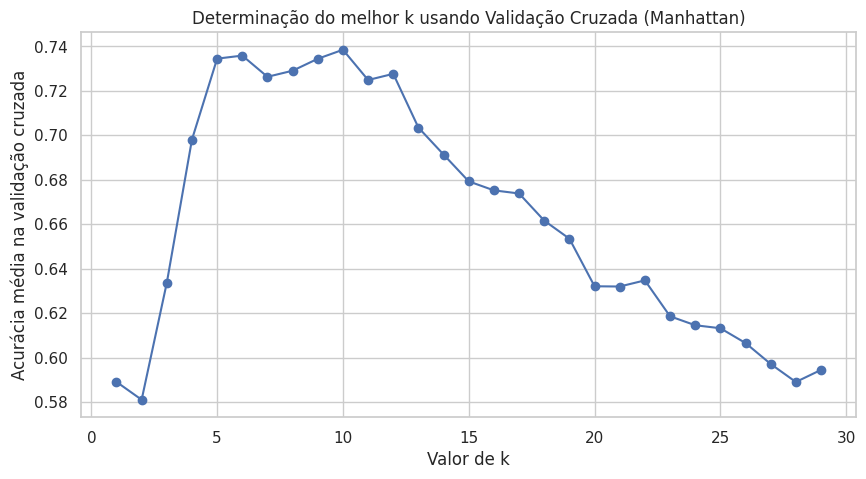

In [31]:
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, X_treino, y_treino, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
optimal_k = k_range[np.argmax(scores)]
print(f'O melhor valor de k é: {optimal_k} com acurácia média de: {max(scores):.4f}')

# Plotar gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média na validação cruzada')
plt.title('Determinação do melhor k usando Validação Cruzada (Manhattan)')
plt.grid(True)
plt.show()

In [30]:
import joblib
import os

# Salve o modelo como .pkl
joblib.dump(knn, "modelos/knn.pkl")

print("Modelo salvo com sucesso em 'modelos/knn.pkl'")

Modelo salvo com sucesso em 'modelos/knn.pkl'


# MLP Section

In [ ]:
MLP = neural_network.MLPClassifier(
    hidden_layer_sizes=(18, 10),
    solver='adam',
    learning_rate_init=0.01,
    momentum=0.1,
    max_iter=2000,
    verbose=True,
    random_state=42
    )
MLP.fit(X_treino, y_treino)

Iteration 1, loss = 1.52746069
Iteration 2, loss = 1.25053117
Iteration 3, loss = 1.17117149
Iteration 4, loss = 1.14099249
Iteration 5, loss = 1.10477433
Iteration 6, loss = 1.07233406
Iteration 7, loss = 1.04711533
Iteration 8, loss = 1.01610378
Iteration 9, loss = 0.99011559
Iteration 10, loss = 0.96185717
Iteration 11, loss = 0.93086603
Iteration 12, loss = 0.90371199
Iteration 13, loss = 0.87320106
Iteration 14, loss = 0.84248025
Iteration 15, loss = 0.81268850
Iteration 16, loss = 0.78346048
Iteration 17, loss = 0.75562387
Iteration 18, loss = 0.73093415
Iteration 19, loss = 0.70771342
Iteration 20, loss = 0.69146156
Iteration 21, loss = 0.66981683
Iteration 22, loss = 0.65087328
Iteration 23, loss = 0.63466659
Iteration 24, loss = 0.61854242
Iteration 25, loss = 0.60405664
Iteration 26, loss = 0.59319140
Iteration 27, loss = 0.57718823
Iteration 28, loss = 0.56332260
Iteration 29, loss = 0.54947303
Iteration 30, loss = 0.54074046
Iteration 31, loss = 0.53047927
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(18, 10), learning_rate_init=0.01,
              max_iter=2000, momentum=0.1, random_state=42, verbose=True)

In [ ]:
y_pred = MLP.predict(X_teste)

In [ ]:
accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred, average='macro', zero_division=0)
recall = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.679144385026738
Precisão: 0.6919376729827549
Recall: 0.6238095238095238
F1-Score: 0.6462752242532808


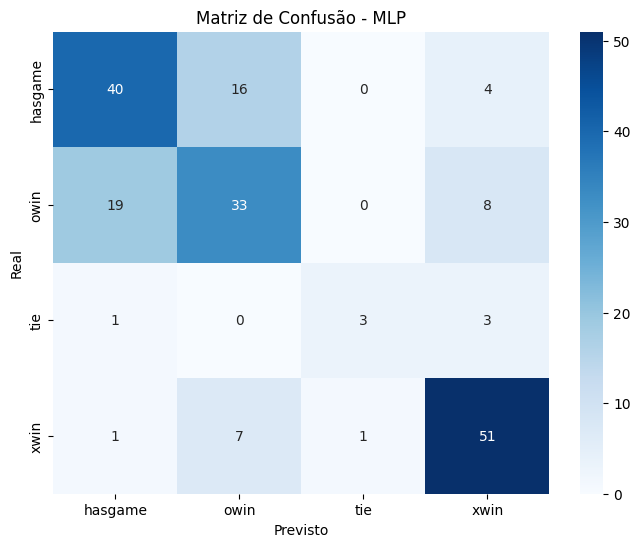

In [ ]:
conf_matrix = confusion_matrix(y_teste, y_pred, labels=MLP.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=MLP.classes_, yticklabels=MLP.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - MLP')
plt.show()

In [23]:
import joblib
import os

# Salve o modelo como .pkl
joblib.dump(MLP, "modelos/mlp.pkl")

print("Modelo salvo com sucesso em 'modelos/mlp.pkl'")

Modelo salvo com sucesso em 'modelos/mlp.pkl'


# SVM Section

In [ ]:
rbf = SVC(kernel='rbf')
rbf.fit(X_treino, y_treino)

poly = SVC(kernel='poly')
poly.fit(X_treino, y_treino)

SVC(kernel='poly')

In [ ]:
y_pred_rbf = rbf.predict(X_teste)
y_pred_poly = poly.predict(X_teste)

In [ ]:
accuracy = accuracy_score(y_teste, y_pred_rbf)
precision = precision_score(y_teste, y_pred_rbf, average='macro', zero_division=0)
recall = recall_score(y_teste, y_pred_rbf, average='macro')
f1 = f1_score(y_teste, y_pred_rbf, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.7540106951871658
Precisão: 0.7456052545430207
Recall: 0.7452380952380953
F1-Score: 0.7452409322752096


In [ ]:
accuracy = accuracy_score(y_teste, y_pred_poly)
precision = precision_score(y_teste, y_pred_poly, average='macro', zero_division=0)
recall = recall_score(y_teste, y_pred_poly, average='macro')
f1 = f1_score(y_teste, y_pred_poly, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.7433155080213903
Precisão: 0.7544823232323232
Recall: 0.6738095238095239
F1-Score: 0.7011937213211576


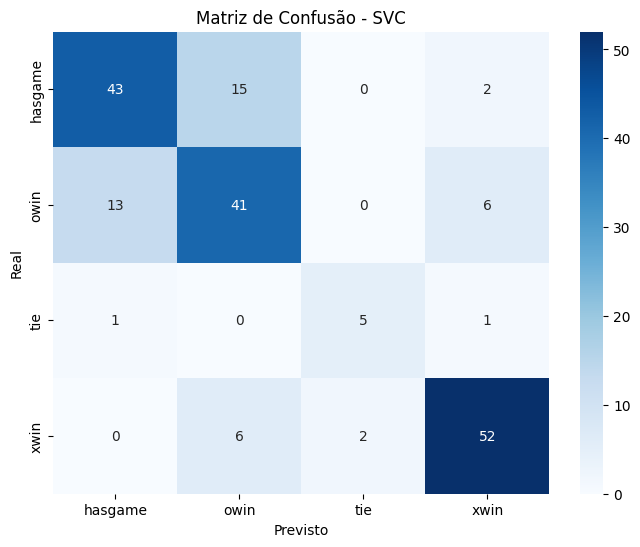

In [ ]:
conf_matrix = confusion_matrix(y_teste, y_pred_rbf, labels=rbf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rbf.classes_, yticklabels=rbf.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - SVC')
plt.show()

In [24]:
import joblib
import os

# Salve o modelo como .pkl
joblib.dump(rbf, "modelos/svm.pkl")

print("Modelo salvo com sucesso em 'modelos/svm.pkl'")

Modelo salvo com sucesso em 'modelos/svm.pkl'


# Decision Tree Section

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
model.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [ ]:
y_pred = model.predict(X_teste)

accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred, average='macro', zero_division=0)
recall = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Acurácia: 0.7379679144385026
Precisão: 0.7566640786749482
Recall: 0.7327380952380952
F1-Score: 0.7421272592683981


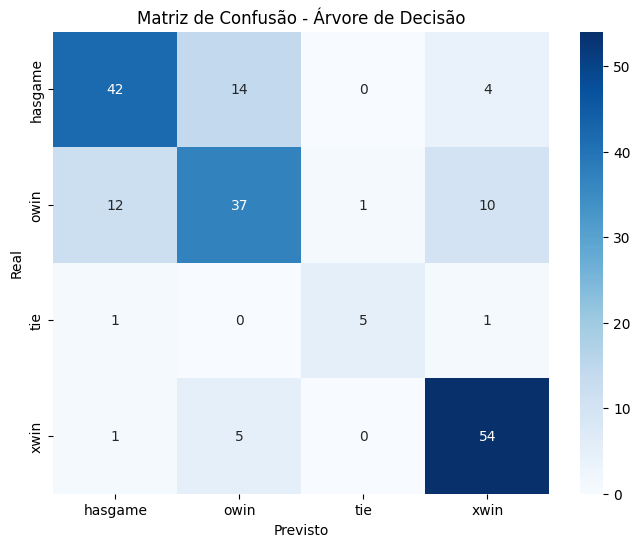

In [ ]:
conf_matrix = confusion_matrix(y_teste, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

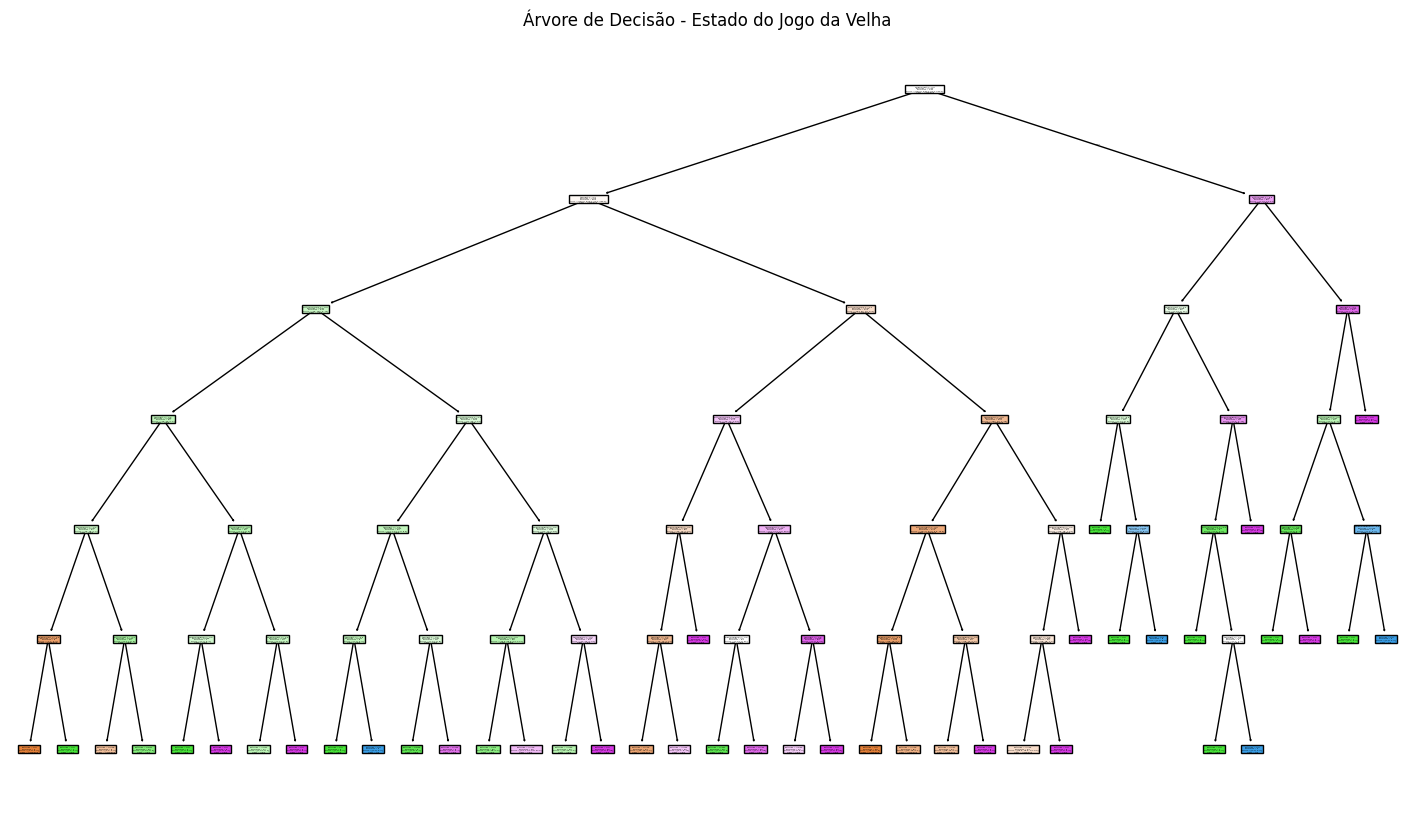

In [ ]:

plt.figure(figsize=(18, 10))
plot_tree(model, filled=True, feature_names=[
    'top-left', 'top-middle', 'top-right',
    'middle-left', 'middle-middle', 'middle-right',
    'bottom-left', 'bottom-middle', 'bottom-right'
], class_names=model.classes_)
plt.title("Árvore de Decisão - Estado do Jogo da Velha")
plt.show()

In [20]:
import joblib
import os

# Salve o modelo como .pkl
joblib.dump(model, "modelos/arvore.pkl")

print("Modelo salvo com sucesso em 'modelos/arvore.pkl'")

Modelo salvo com sucesso em 'modelos/arvore.pkl'
